# 1 - Introduction

Name : Huesca Rashad Nadiputra

Batch : FTDS-016-RMT

Dataset : Telco Customer Churn

Objective : Make an Artifical Neural Network model using Sequential API and Functional API.

Problem description:
- Describe out users demographic!
- Are there any significant difference between contract and user loyalty?
- Compare our two main service (phone and internet)!
- Compare our 3 additional service on our main internet service!
- Is it true that our older users tend to only uses our phone service?
- Is it true that our users with dependents are more likely to use movie streaming servie rather than TV streaming service?
- Compare our user monthly charges based on their demographic!
- Compare our user churn rate based on their demographic!
- Is there any correlation between duration of tenure and contract with churn rate?
- Is it true that users with low monthly charges is more likely to churn?

# 2 - Import Libraries

We will use the following libraries for this task.

In [108]:
# Import Libraries

import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, concatenate, BatchNormalization
from tensorflow.keras import Model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

import joblib
from tensorflow.keras.models import load_model

# 3 - Data Loading

First we are going to load the dataset that we will use using pd.read_csv.

In [2]:
# Load Dataset

raw = pd.read_csv('Telco-Customer-Churn.csv')
raw

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Before we do anything else to our dataset, it is recommended to duplicate it first.

In [3]:
# Duplicate Dataset

df = raw.copy()

We can see the top and bottom datas of this dataset using .head and .tail.

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


We can also check a quick summary of our dataset using .info().

In [6]:
# Check Dataset - 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


From the information we can see that there are no null-value, but the TotalCharges feature assigned as object which is wrong, because it should be float, so we will change it.

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors= 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Now that we changed the datatype for TotalCharges, it turns out that some data are null-valued, we will handle this later in preprocessing.

We could also use .describe() to check our dataset further.

In [8]:
# Check Dataset - 2

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


We can see that there are no negative value herem so we could assume that our data is safe for now.

# 4 - Exploratory Data Analysis (EDA)

In [9]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


Now we will do more exploration about all the feature of our datasets.

## 4.1 - Demographic

The first set of features is the Demographic info about customers such as gender, age range, and whether if they have partners and dependents.

In [10]:
def sunb_plots(var1, var2):
    ## dataframe creation - for plotting
    df_combinations = (
        df.groupby([var1, var2])
        .size()
        .reset_index()
        .rename(columns={0: "count"})
    )
    ## Creating sunburst chart
    # define figure element
    fig = px.sunburst(
        df,
        path=[var1, var2],
        color=var1)
    fig.update_traces(textinfo="label+percent parent")
    
    # display the figure
    fig.show()

In [11]:
sunb_plots('gender', 'SeniorCitizen')

We can see that the gender of our customers are evenly distributed and only a small portion of them are within the old age range.

In [12]:
sunb_plots('Partner', 'Dependents')

It seems that the customers with and without partner are nearly evenly distributed, but the customers withour partner are most likely won't have any dependents with them.

We can summarize that our user demographic as:
- Balanced between genders and marriage status.
- Only small portion are senior citizens.
- There are more users without dependents, and the one with dependents are most likely in a marriage status.

## 4.2 - Account Information

The next set of features are the Customer account information that includes how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.

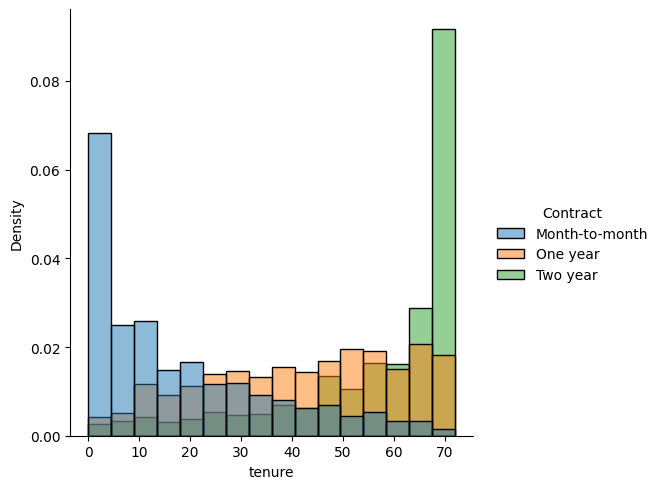

In [13]:
sns.displot(df, x="tenure", hue="Contract", stat='density', common_norm=False)

Based on the distribution plot above, we can see that customers with short tenure is dominated by the one with month-to-month contracts, while the one with long tenure is dominated by customers with two-year contracts so we could say that there are significant difference between contract and user loyalty.

In [14]:
sunb_plots('PaperlessBilling', 'PaymentMethod')

It seems that customers with paperless billing tend to use electronic check as payment method, while the one with paper billing tend to use conventional mailed check as their payment method.

<AxesSubplot: xlabel='MonthlyCharges', ylabel='TotalCharges'>

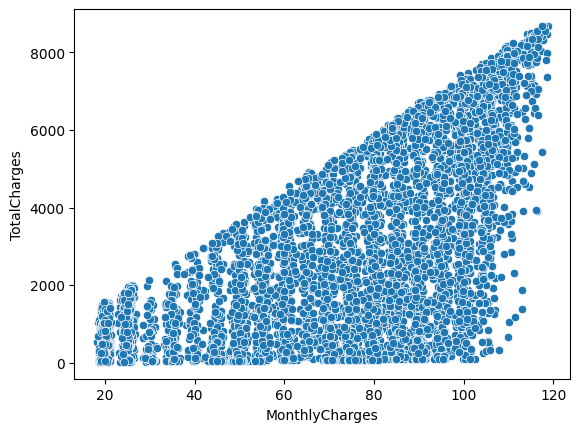

In [15]:
sns.scatterplot(data=df, x="MonthlyCharges", y="TotalCharges")

We can see that the higher total charges gets the minimum monthly charges also gets higher, for example total charges 2000 have a minimum monthly charges around 20-30 while total charges 4000 have a minimum monthly charges around 50-60 and so on.

## 4.3 - Services

The last set of features are Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.

In [16]:
sunb_plots('PhoneService', 'InternetService')

We can see that most of our users uses our internet service and almost all of them uses our phone service.

In [17]:
sunb_plots('PhoneService', 'MultipleLines')

Based on the plot above, we can see that the users with our phone service is nearly evenly distributed whether they use multiple lines or not.

<AxesSubplot: ylabel='InternetService'>

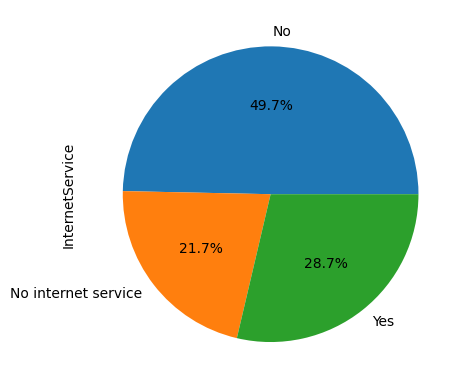

In [18]:
data = df.groupby("OnlineSecurity")["InternetService"].count()
data.plot.pie(autopct="%.1f%%")

<AxesSubplot: ylabel='InternetService'>

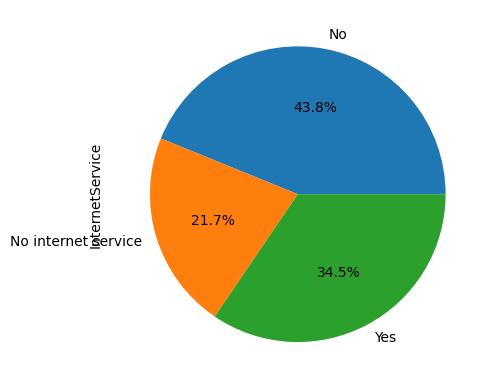

In [19]:
data = df.groupby("OnlineBackup")["InternetService"].count()
data.plot.pie(autopct="%.1f%%")

<AxesSubplot: ylabel='InternetService'>

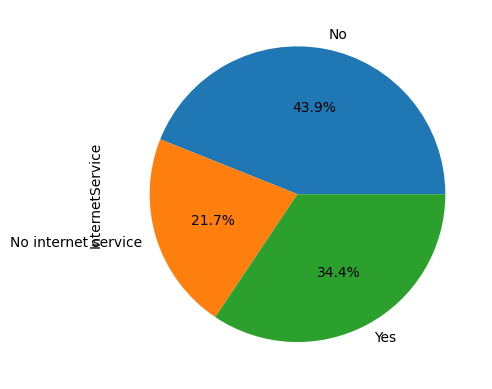

In [20]:
data = df.groupby("DeviceProtection")["InternetService"].count()
data.plot.pie(autopct="%.1f%%")

From this 3 pie charts we can see that the online security service is the one with least users between the 3 service we provided.

In [21]:
sunb_plots('InternetService', 'TechSupport')

Based on this pie chart we can see that the user with DSL internet service is more likely to ask for tech support than the one with fiber optic internet service.

<AxesSubplot: ylabel='InternetService'>

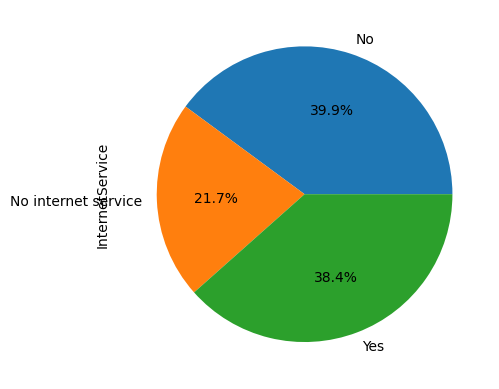

In [22]:
data = df.groupby("StreamingTV")["InternetService"].count()
data.plot.pie(autopct="%.1f%%")

<AxesSubplot: ylabel='InternetService'>

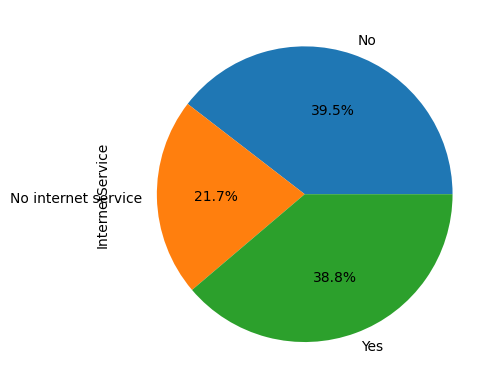

In [23]:
data = df.groupby("StreamingMovies")["InternetService"].count()
data.plot.pie(autopct="%.1f%%")

From these two charts we can see that there are no significant number of user difference between these two service that we provided.

## 4.4 - Connection Between Features

Now we will see the connection between our 3 sets of features.

In [24]:
sunb_plots('SeniorCitizen', 'InternetService')

We can see that 96% of our senior citizen users uses our internet service, so we cannot say that the older user tend to only uses our phone service.

In [25]:
sunb_plots('Dependents', 'StreamingTV')

In [26]:
sunb_plots('Dependents', 'StreamingMovies')

We can see from the two charts that the users with dependents have no significant difference between whether they use our TV or movie streaming service.

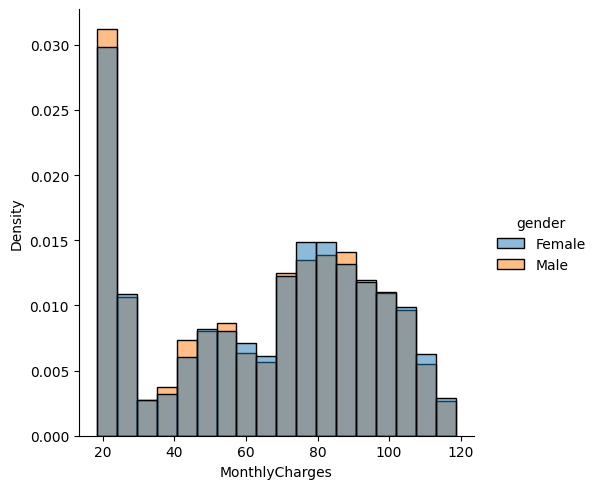

In [27]:
sns.displot(df, x="MonthlyCharges", hue="gender", stat='density', common_norm=False)

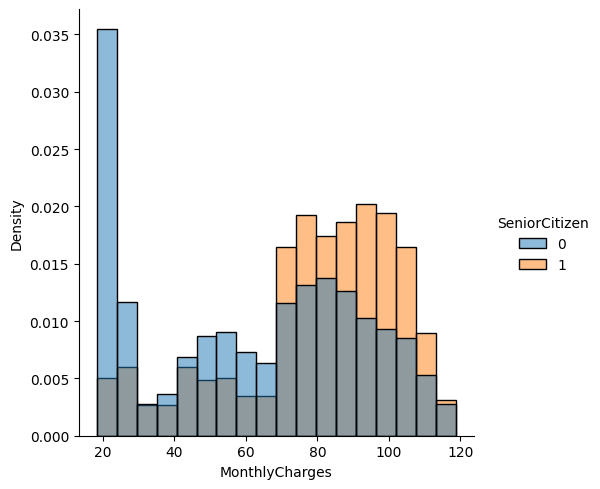

In [28]:
sns.displot(df, x="MonthlyCharges", hue="SeniorCitizen", stat='density', common_norm=False)

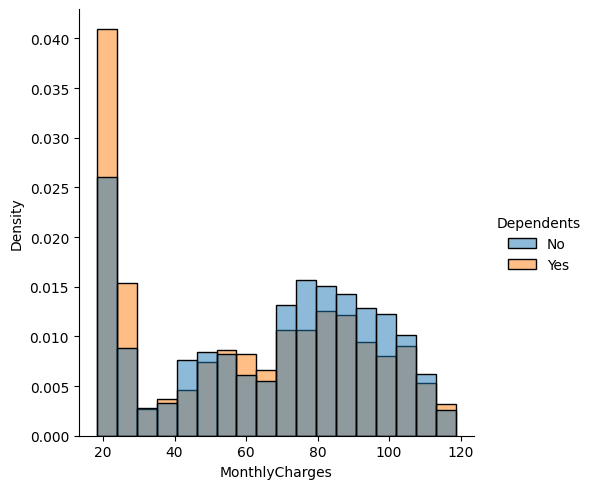

In [29]:
sns.displot(df, x="MonthlyCharges", hue="Dependents", stat='density', common_norm=False)

From this 3 distribution plot we could assume that:
- There are no significant difference between genders and monthly charges.
- Older users tend to have higher monthly charges.
- User with low monthly charges tend to have dependents on their households.

## 4.5 - Churn

After looking for connections between features, let's see our target which is churn that have the information about Customers who left within the last month.

<AxesSubplot: ylabel='customerID'>

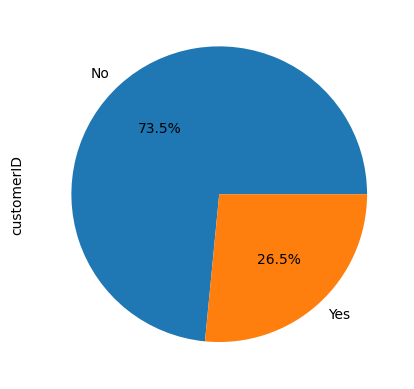

In [30]:
data = df.groupby("Churn")["customerID"].count()
data.plot.pie(autopct="%.1f%%")

From this chart we can see that we have a pretty big churn rate of 26,5% which is very concerning. In dataset point of view this target is slightly imbalanced, so we will uses stratified when we split the data.

## 4.6 - Connection with Target

In [31]:
sunb_plots('gender', 'Churn')

In [32]:
sunb_plots('SeniorCitizen', 'Churn')

In [33]:
sunb_plots('Dependents', 'Churn')

Based on the 3 types of demographic we can say that the one that most likely to churn are the senior citizens.

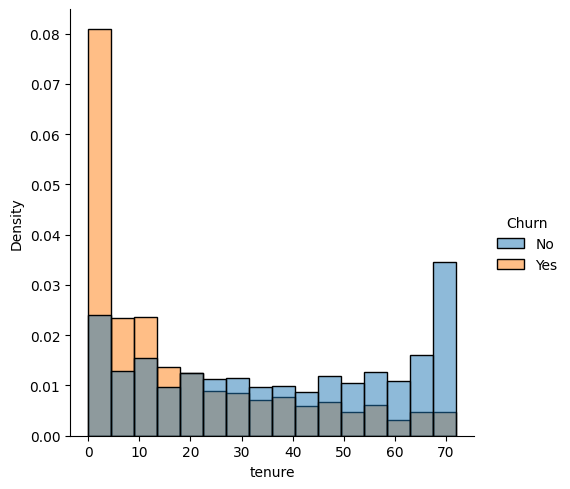

In [34]:
sns.displot(df, x="tenure", hue="Churn", stat='density', common_norm=False)

In [35]:
sunb_plots('Contract', 'Churn')

Based on tenure and type of contracts we can say that users with longer terms are less likely to churn.

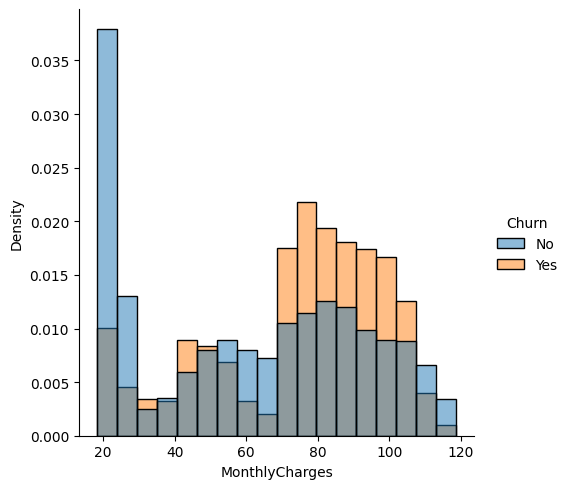

In [36]:
sns.displot(df, x="MonthlyCharges", hue="Churn", stat='density', common_norm=False)

We can see that user with low monthly charges is less likely to churn, on the other hand there are a range of monthly charges that have a significant portion of churned users which is around 70-110.

# 5 - Data Preprocessing

## 5.1 - Get Data for Model Inference

The first thing to do in preprocessing is to split a little sample from our dataset to be our inference data, but we also needs to change our target to binary (1 and 0).

In [37]:
df['Churn'] = df.Churn.eq('Yes').mul(1)

In [38]:
# Get Data for Model Inference

data_inf = df.sample(10, random_state=1)
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3381,8879-ZKJOF,Female,0,No,No,41,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75,0
6180,0201-MIBOL,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85,0
4829,1600-DILPE,Female,0,No,No,12,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35,0
3737,8601-QACRS,Female,0,No,No,5,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95,1
4249,7919-ZODZZ,Female,0,Yes,Yes,10,Yes,No,DSL,No,...,Yes,No,No,Yes,One year,Yes,Mailed check,65.90,660.05,0
6835,7964-ZRKKG,Male,0,Yes,No,67,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,One year,Yes,Bank transfer (automatic),88.40,5798.30,0
3869,1357-BIJKI,Male,0,Yes,No,50,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,One year,Yes,Electronic check,98.25,4858.70,0
3943,8720-RQSBJ,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,44.00,44.00,0
3491,4682-BLBUC,Male,0,Yes,No,44,Yes,No,DSL,No,...,Yes,Yes,Yes,No,One year,Yes,Electronic check,70.95,3250.45,0
6847,8930-XOTDP,Female,0,Yes,Yes,18,Yes,No,DSL,No,...,No,No,Yes,No,Month-to-month,No,Mailed check,55.95,1082.80,0


After we split the data we will remove those data from our dataset.

In [39]:
# Remove Inference-Set from Dataset

data_train_test = df.drop(data_inf.index)

# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

data_train_test


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7028,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7029,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7030,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7031,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


## 5.2 - Train-Test Splitting

Next we will split our data into train-set and test-set, we will use ratio of 80:20 to split them and also use stratify on our target to keep the split proportion equal between the target categories.

In [40]:
# Split between Train-Set, Val-Set, and Test-Set

train_val, test = train_test_split(data_train_test, test_size=0.15, random_state=1, stratify=data_train_test['Churn'])
train, val = train_test_split(train_val, test_size=0.15, random_state=1, stratify=train_val['Churn'])

print('Train Size : ', train.shape)
print('Val Size : ', val.shape)
print('Test Size : ', test.shape)

Train Size :  (5081, 21)
Val Size :  (897, 21)
Test Size :  (1055, 21)


## 5.3 - Handling Missing Values

From our early exploration we did find some missing values in TotalCharges feature, we will check it further.

In [41]:
train[train['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0
5211,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
6662,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0
4374,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0


It seems that all the null-valued have 0 tenure let's do a cross-check with the 0 valued tenure.

In [42]:
train[train['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0
5211,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
6662,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0
4374,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0


Our assumptions is right, and because there are only a few data with 0 tenure, we will just remove it from our dataset.

In [43]:
train.dropna(inplace=True)
val.dropna(inplace=True)
test.dropna(inplace=True)

In [44]:
(train.isnull().sum()).sum(), (val.isnull().sum()).sum(), (test.isnull().sum()).sum()

(0, 0, 0)

## 5.4 - Handling Outlier

Now we will check our dataset to find any outliers, there are only 3 numeric feature and we will select them.

In [45]:
check_train = train[['tenure', 'MonthlyCharges', 'TotalCharges']].copy()


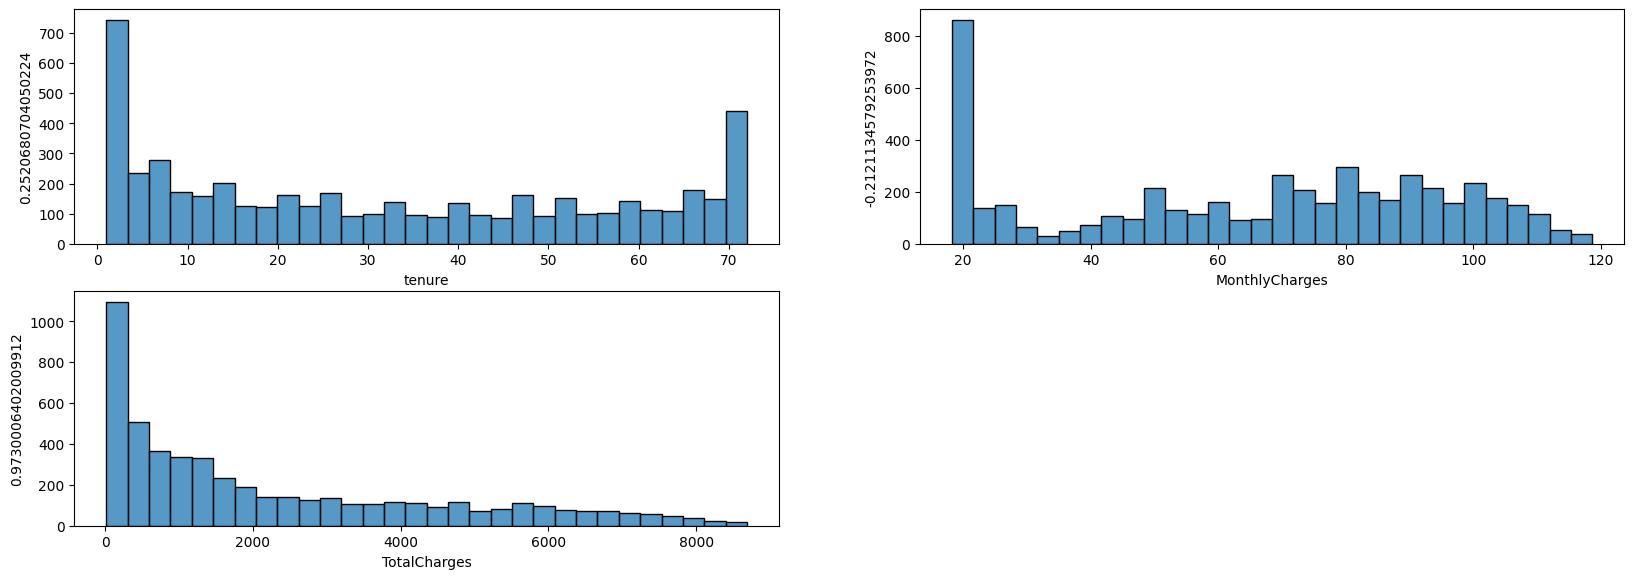

In [46]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in check_train:
    if plotnumber<=14 :
        ax = plt.subplot(7,2,plotnumber)
        sns.histplot(check_train[column], bins=30)
        plt.xlabel(column,fontsize=10)
        text = check_train[column].skew()
        plt.ylabel(text,fontsize=10)
    plotnumber+=1
plt.show()

We can see that TotalCharges have skewed distribution while the others are normal. We will find the outliers in TotalCharges first by using IQR test.

In [47]:
IQR = train['TotalCharges'].quantile(0.75) - train['TotalCharges'].quantile(0.25)

lower_boundary = train['TotalCharges'].quantile(0.25) - (IQR * 1.5)
upper_boundary = train['TotalCharges'].quantile(0.75) + (IQR * 1.5)

upper_boundary, lower_boundary

(8816.493750000001, -4656.056250000001)

In [48]:
outltrain = train[((train['TotalCharges'] < lower_boundary) |(train['TotalCharges'] > upper_boundary))]
outltrain

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


It seems that there are no outliers here, let's check the other features with z-score test.

In [49]:
outl1 = train.copy()
outl1['Z-Score'] = stats.zscore(outl1.tenure)
zscore = outl1['Z-Score']
outl1 = outl1[(zscore>3) | (zscore<-3)]
outl1.sort_values('Z-Score')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Z-Score


In [50]:
outl2 = train.copy()
outl2['Z-Score'] = stats.zscore(outl2.MonthlyCharges)
zscore = outl2['Z-Score']
outl2 = outl2[(zscore>3) | (zscore<-3)]
outl2.sort_values('Z-Score')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Z-Score


There are no outliers either here, so we can move on.

## 5.5 - Feature Selection

In [51]:
# Display Train-set

train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3899,5206-XZZQI,Male,0,No,No,53,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,80.60,4348.10,0
1820,7554-AKDQF,Female,0,Yes,No,6,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,45.65,323.45,0
952,8467-WYNSR,Male,0,No,No,22,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,No,Mailed check,55.10,1253.15,0
3627,7527-QNRUS,Male,0,Yes,Yes,17,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,25.15,412.60,0
5657,0875-CABNR,Female,1,No,No,10,Yes,No,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),84.60,865.55,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2929,2606-PKWJB,Male,0,No,Yes,40,No,No phone service,DSL,Yes,...,No,Yes,No,No,One year,No,Mailed check,40.25,1564.05,0
2539,2050-ONYDQ,Female,0,Yes,Yes,65,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),26.00,1654.85,0
5535,2990-OGYTD,Female,0,Yes,No,67,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),86.15,5883.85,0
724,5244-IRFIH,Male,1,Yes,No,33,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.50,3105.55,1


Now we will do feature selection by using anova to find the correlation between our numerical features and our target.

In [52]:
model = ols('tenure ~ Churn', data=train).fit()
anova = sm.stats.anova_lm(model)
anova

,df,sum_sq,mean_sq,F,PR(>F)
Churn,1.0,3.784170e+05,378417.024293,724.498165,2.796656e-149
Residual,5072.0,2.649187e+06,522.316056,NaN,NaN


In [53]:
model = ols('MonthlyCharges ~ Churn', data=train).fit()
anova = sm.stats.anova_lm(model)
anova

,df,sum_sq,mean_sq,F,PR(>F)
Churn,1.0,1.747477e+05,174747.727700,200.28137,1.269212e-44
Residual,5072.0,4.425377e+06,872.511148,NaN,NaN


In [54]:
model = ols('TotalCharges ~ Churn', data=train).fit()
anova = sm.stats.anova_lm(model)
anova

,df,sum_sq,mean_sq,F,PR(>F)
Churn,1.0,1.012164e+09,1.012164e+09,206.19639,7.287405e-46
Residual,5072.0,2.489712e+10,4.908737e+06,NaN,NaN


It seems that all 3 features have p-values (PR>F) that are smaller than 0.05 which means that they all have correlations with our target.

For the rest of the features we will use chi square test to determined the correlation with our target.

In [55]:
chi = train.copy()
chi = chi.drop(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], axis=1)
columns = list(chi.columns)

chi2_check = []
for i in columns:
    if chi2_contingency(pd.crosstab(train['Churn'], train[i]))[1] < 0.05:
        chi2_check.append('There are correlation')
    else:
        chi2_check.append('There are no correlation')

res = pd.DataFrame(data=
[columns, chi2_check]).T
res.columns = ['Column', 'Correlation']
print(res)

              Column               Correlation
0             gender  There are no correlation
1      SeniorCitizen     There are correlation
2            Partner     There are correlation
3         Dependents     There are correlation
4       PhoneService  There are no correlation
5      MultipleLines     There are correlation
6    InternetService     There are correlation
7     OnlineSecurity     There are correlation
8       OnlineBackup     There are correlation
9   DeviceProtection     There are correlation
10       TechSupport     There are correlation
11       StreamingTV     There are correlation
12   StreamingMovies     There are correlation
13          Contract     There are correlation
14  PaperlessBilling     There are correlation
15     PaymentMethod     There are correlation


Now we will drip the features that have no correlation with our target.

In [56]:
# Drop Column
train = train.drop(['customerID', 'gender', 'PhoneService'], axis=1)
val = val.drop(['customerID', 'gender', 'PhoneService'], axis=1)
test = test.drop(['customerID', 'gender', 'PhoneService'], axis=1)
train

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3899,0,No,No,53,No,Fiber optic,No,Yes,No,Yes,No,No,Month-to-month,Yes,Mailed check,80.60,4348.10,0
1820,0,Yes,No,6,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,45.65,323.45,0
952,0,No,No,22,No,DSL,Yes,No,No,Yes,No,No,Month-to-month,No,Mailed check,55.10,1253.15,0
3627,0,Yes,Yes,17,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,25.15,412.60,0
5657,1,No,No,10,No,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),84.60,865.55,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2929,0,No,Yes,40,No phone service,DSL,Yes,Yes,No,Yes,No,No,One year,No,Mailed check,40.25,1564.05,0
2539,0,Yes,Yes,65,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),26.00,1654.85,0
5535,0,Yes,No,67,Yes,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),86.15,5883.85,0
724,1,Yes,No,33,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.50,3105.55,1


## 5.6 - Splitting between Features and Target

After we select all our features, we will do splitting between those features and our target.

In [57]:
# Splitting between `X` and `y`

X_train = train.drop(['Churn'], axis=1)
X_val = val.drop(['Churn'], axis=1)
X_test = test.drop(['Churn'], axis=1)
y_train = train['Churn']
y_val = val['Churn']
y_test = test['Churn']
X_train

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3899,0,No,No,53,No,Fiber optic,No,Yes,No,Yes,No,No,Month-to-month,Yes,Mailed check,80.60,4348.10
1820,0,Yes,No,6,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,45.65,323.45
952,0,No,No,22,No,DSL,Yes,No,No,Yes,No,No,Month-to-month,No,Mailed check,55.10,1253.15
3627,0,Yes,Yes,17,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,25.15,412.60
5657,1,No,No,10,No,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),84.60,865.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2929,0,No,Yes,40,No phone service,DSL,Yes,Yes,No,Yes,No,No,One year,No,Mailed check,40.25,1564.05
2539,0,Yes,Yes,65,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),26.00,1654.85
5535,0,Yes,No,67,Yes,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),86.15,5883.85
724,1,Yes,No,33,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.50,3105.55


## 5.7 - Get Numerical and Categorical Columns

In [58]:
# Get Numerical Columns and Categorical Columns

cat = X_train.copy()
cat = cat.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], axis=1)
cat_columns = list(cat.columns)
num_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

print('Numerical Columns   : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns   :  ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns :  ['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


We will use standardscaler because most of our feature have normal distribution and onehotencoder because there are no ranked categories in our features.

In [59]:
# Feature Scaling

scaler = StandardScaler()

In [60]:
# Feature Encoding

encoder = OneHotEncoder()

## 5.8 - Pipeline

Now we will build a pipeline that represents our preprocessing.

In [61]:
# Create A Pipeline

num_pipeline = make_pipeline(scaler)

cat_pipeline = make_pipeline(encoder)

final_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

In [62]:
# Fit and Transform

X_train = final_pipeline.fit_transform(X_train)
X_val = final_pipeline.transform(X_val)
X_test = final_pipeline.transform(X_test)
X_train.shape

(5074, 42)

In [63]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.853589,0.527398,0.921163,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.070493,-0.633349,-0.859885,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.415487,-0.319499,-0.448460,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.620176,-1.314188,-0.820433,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.906742,0.660245,-0.619987,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5069,0.321396,-0.812692,-0.310876,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5070,1.344844,-1.285958,-0.270694,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
5071,1.426719,0.711723,1.600786,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
5072,0.034830,0.989040,0.371291,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# 6 - Model Definition

## 6.1 - Sequential API

The first model is using sequential API, we will use 3 hidden layers with relu as activation, and sigmoid as activation on output layer because the output will be binary.

In [65]:
# Create Sequential API

model_sequential = Sequential()
model_sequential.add(Dense(25, activation='relu', input_shape=(42,))) # Hidden Layer 1
model_sequential.add(Dense(15, activation='relu')) # Hidden Layer 2
model_sequential.add(Dense(10, activation='relu')) # Hidden Layer 3
model_sequential.add(Dense(1, activation='sigmoid')) # Output Layer

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['accuracy'])

model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                1075      
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,636
Trainable params: 1,636
Non-trainable params: 0
_________________________________________________________________


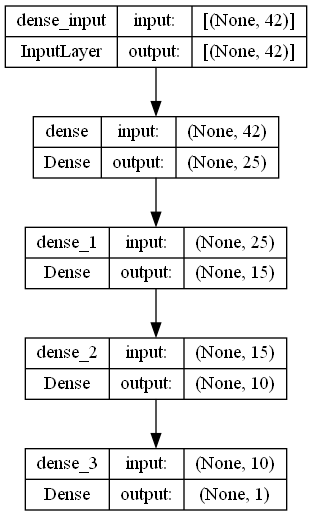

In [66]:
# Plot Layers

tf.keras.utils.plot_model(model_sequential, show_shapes=True)

## 6.2 - Functional API

We will use a similar architecture for our second model which is functional API but we will add a concat layer before the output layer.

In [67]:
# Create Functional Model

input_layer = Input(shape=(42,))
hidden1_layer = Dense(25, activation='relu')(input_layer)
hidden2_layer = Dense(15, activation='relu')(hidden1_layer)
hidden3_layer = Dense(10, activation='relu')(hidden2_layer)

concat_layer = concatenate([input_layer, hidden3_layer])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['accuracy'])

model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 42)]         0           []                               
                                                                                                  
 dense_4 (Dense)                (None, 25)           1075        ['input_1[0][0]']                
                                                                                                  
 dense_5 (Dense)                (None, 15)           390         ['dense_4[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 10)           160         ['dense_5[0][0]']                
                                                                                              

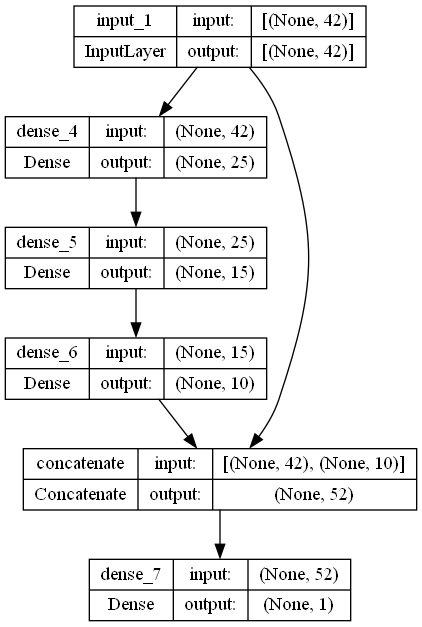

In [68]:
# Plot Layers

tf.keras.utils.plot_model(model_functional, show_shapes=True)

# 7 - Model Training

We will duplicate our data 3 times with repeat, then shuffle them before we do some batching with the data. We will include all this step in one pipeline like this code below.

In [64]:
train_pipe = tf.data.Dataset.from_tensor_slices((X_train,y_train)).repeat(3).shuffle(100).batch(50)
val_pipe = tf.data.Dataset.from_tensor_slices((X_val,y_val)).repeat(3).shuffle(100).batch(50)

Now we will train each model using 25 epochs.

## 7.1 - Sequential API

In [69]:
%%time
his1 = model_sequential.fit(train_pipe, epochs=25, validation_data=val_pipe)

Epoch 1/25
305/305 [==============================] - 2s 4ms/step - loss: 0.4689 - accuracy: 0.7787 - val_loss: 0.4258 - val_accuracy: 0.8013
Epoch 2/25
305/305 [==============================] - 1s 3ms/step - loss: 0.4160 - accuracy: 0.8029 - val_loss: 0.4217 - val_accuracy: 0.8036
Epoch 3/25
305/305 [==============================] - 1s 3ms/step - loss: 0.4110 - accuracy: 0.8052 - val_loss: 0.4212 - val_accuracy: 0.8058
Epoch 4/25
305/305 [==============================] - 1s 3ms/step - loss: 0.4078 - accuracy: 0.8058 - val_loss: 0.4212 - val_accuracy: 0.8058
Epoch 5/25
305/305 [==============================] - 1s 3ms/step - loss: 0.4047 - accuracy: 0.8082 - val_loss: 0.4215 - val_accuracy: 0.8058
Epoch 6/25
305/305 [==============================] - 1s 3ms/step - loss: 0.4024 - accuracy: 0.8075 - val_loss: 0.4222 - val_accuracy: 0.8013
Epoch 7/25
305/305 [==============================] - 1s 3ms/step - loss: 0.3992 - accuracy: 0.8099 - val_loss: 0.4233 - val_accuracy: 0.8047
Epoch 

## 7.2 - Functional API

In [70]:
%%time
his2 = model_functional.fit(train_pipe, epochs=25, validation_data=val_pipe)

Epoch 1/25
305/305 [==============================] - 2s 4ms/step - loss: 0.4606 - accuracy: 0.7801 - val_loss: 0.4216 - val_accuracy: 0.8158
Epoch 2/25
305/305 [==============================] - 1s 3ms/step - loss: 0.4157 - accuracy: 0.8006 - val_loss: 0.4198 - val_accuracy: 0.8158
Epoch 3/25
305/305 [==============================] - 1s 3ms/step - loss: 0.4112 - accuracy: 0.8023 - val_loss: 0.4202 - val_accuracy: 0.8136
Epoch 4/25
305/305 [==============================] - 1s 3ms/step - loss: 0.4082 - accuracy: 0.8046 - val_loss: 0.4185 - val_accuracy: 0.8147
Epoch 5/25
305/305 [==============================] - 1s 3ms/step - loss: 0.4061 - accuracy: 0.8063 - val_loss: 0.4181 - val_accuracy: 0.8170
Epoch 6/25
305/305 [==============================] - 1s 3ms/step - loss: 0.4040 - accuracy: 0.8081 - val_loss: 0.4194 - val_accuracy: 0.8136
Epoch 7/25
305/305 [==============================] - 1s 3ms/step - loss: 0.4019 - accuracy: 0.8105 - val_loss: 0.4189 - val_accuracy: 0.8092
Epoch 

# 8 - Model Evaluation

## 8.1 - Sequential API

In [71]:
# Create DataFrame

history_seq_df = pd.DataFrame(his1.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.468869,0.778676,0.425809,0.801339
1,0.415985,0.802851,0.421719,0.803571
2,0.410965,0.805150,0.421245,0.805804
3,0.407805,0.805807,0.421199,0.805804
4,0.404727,0.808238,0.421533,0.805804
5,0.402372,0.807515,0.422172,0.801339
6,0.399209,0.809880,0.423302,0.804688
7,0.396387,0.810537,0.426988,0.799107
8,0.393770,0.811260,0.430986,0.795759
9,0.391223,0.813625,0.432197,0.803571


<AxesSubplot: >

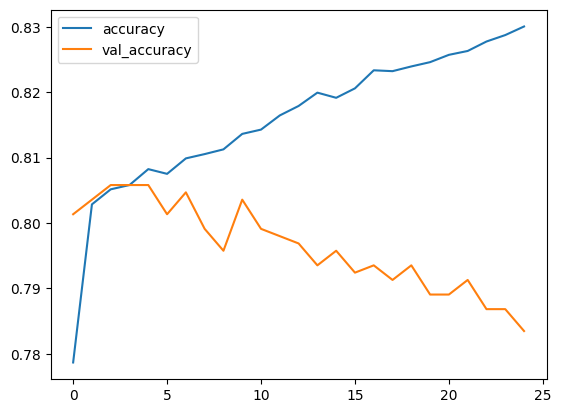

In [72]:
# Plot between accuracy and val_accuracy


history_seq_df[['accuracy', 'val_accuracy']].plot()

<AxesSubplot: >

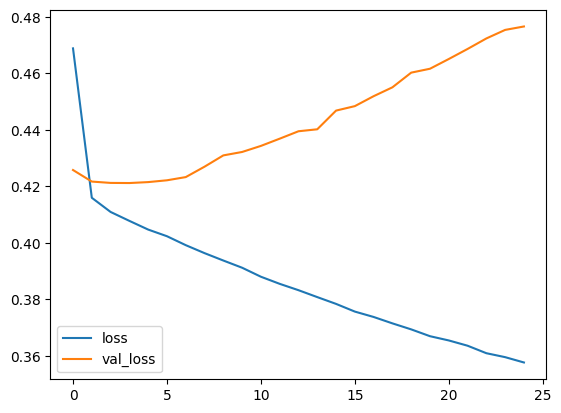

In [73]:
# Plot between loss and val_loss

history_seq_df[['loss', 'val_loss']].plot()

We can see from the two graphs above that the data tend to be more overfit along with number of trainings done.

33/33 [==============================] - 0s 1ms/step


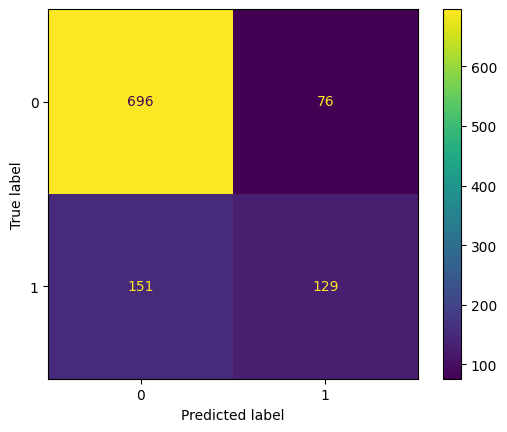

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       772
           1       0.63      0.46      0.53       280

    accuracy                           0.78      1052
   macro avg       0.73      0.68      0.70      1052
weighted avg       0.77      0.78      0.77      1052



In [74]:
# Model Evaluation

y_pred_seq = model_sequential.predict(X_test)
y_pred_seq = np.where(y_pred_seq >=0.5, 1, 0)

cm = confusion_matrix(y_test, y_pred_seq)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

print(classification_report(y_test, y_pred_seq))

Although having a pretty good f1 macro score for the negative prediction, our model performed pretty badly to predict the true positive data with macro average only at 0.53 and 0.78 accuracy.

## 8.2 - Functional API

We will do the same method with our second model.

In [75]:
# Create DataFrame

history_fun_df = pd.DataFrame(his2.history)
history_fun_df

,loss,accuracy,val_loss,val_accuracy
0,0.460627,0.780055,0.421586,0.815848
1,0.415727,0.800552,0.419768,0.815848
2,0.411207,0.802326,0.420214,0.813616
3,0.408154,0.804559,0.418472,0.814732
4,0.406150,0.806333,0.418100,0.816964
5,0.404042,0.808107,0.419422,0.813616
6,0.401862,0.810472,0.418919,0.809152
7,0.399865,0.811326,0.418756,0.808036
8,0.397892,0.812245,0.418929,0.806920
9,0.395837,0.813691,0.419591,0.802455


<AxesSubplot: >

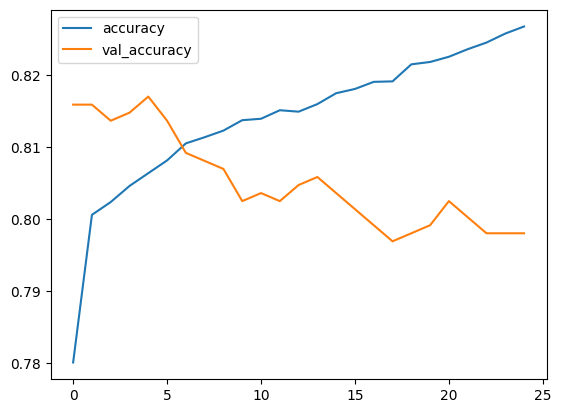

In [76]:
# Plot between accuracy and val_accuracy


history_fun_df[['accuracy', 'val_accuracy']].plot()

<AxesSubplot: >

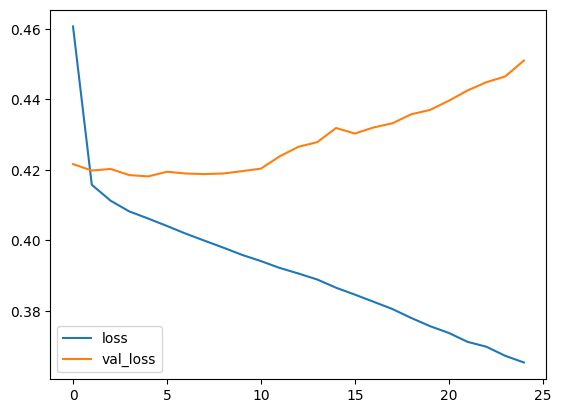

In [77]:
# Plot between loss and val_loss

history_fun_df[['loss', 'val_loss']].plot()

The two graphs shown as a similar thing with the previous model that the data tend to be more overfit along with more training done.

33/33 [==============================] - 0s 1ms/step


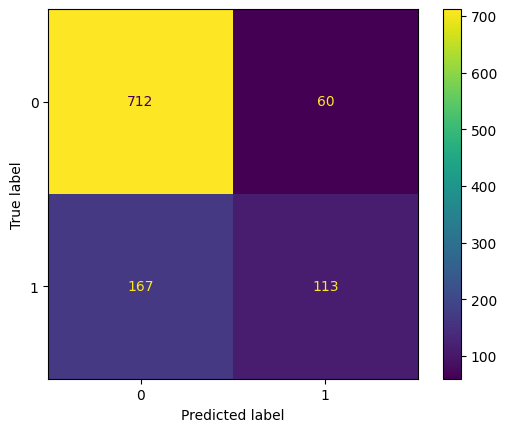

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       772
           1       0.65      0.40      0.50       280

    accuracy                           0.78      1052
   macro avg       0.73      0.66      0.68      1052
weighted avg       0.77      0.78      0.77      1052



In [78]:
# Model Evaluation

y_pred_fun = model_functional.predict(X_test)
y_pred_fun = np.where(y_pred_fun >=0.5, 1, 0)

cm = confusion_matrix(y_test, y_pred_fun)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

print(classification_report(y_test, y_pred_fun))

This model have a slightly worst performance than the first model, so now we will have to try to improve both models performance.

## 8.3 - Improved Sequential API

We will try to improve our model by applying normalization layer in our API.

In [79]:
# Create Sequential API

model_sequential2 = Sequential()
model_sequential2.add(Dense(25, activation='relu', input_shape=(42,))) # Hidden Layer 1
model_sequential2.add(BatchNormalization())
model_sequential2.add(Dense(15, activation='relu')) # Hidden Layer 2
model_sequential2.add(BatchNormalization())
model_sequential2.add(Dense(10, activation='relu')) # Hidden Layer 3
model_sequential2.add(BatchNormalization())
model_sequential2.add(Dense(1, activation='sigmoid')) # Output Layer

# Compile
model_sequential2.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['accuracy'])

model_sequential2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 25)                1075      
                                                                 
 batch_normalization (BatchN  (None, 25)               100       
 ormalization)                                                   
                                                                 
 dense_9 (Dense)             (None, 15)                390       
                                                                 
 batch_normalization_1 (Batc  (None, 15)               60        
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (None, 10)                160       
                                                                 
 batch_normalization_2 (Batc  (None, 10)              

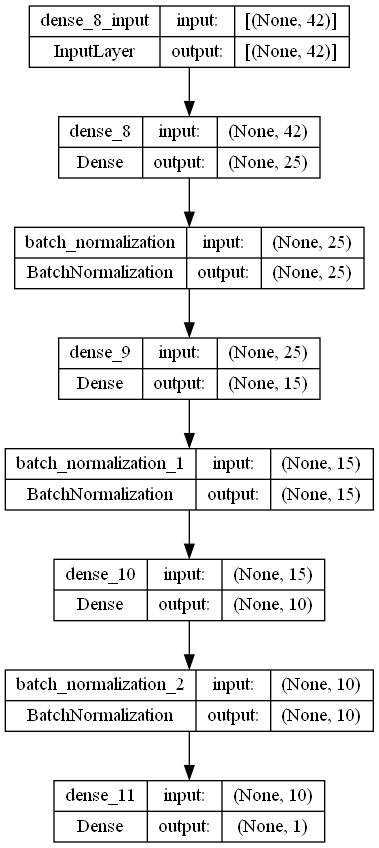

In [80]:
# Plot Layers

tf.keras.utils.plot_model(model_sequential2, show_shapes=True)

We will also apply earlystopping callback to prevent further overfit in this model.

In [81]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

In [82]:
%%time
his3 = model_sequential2.fit(train_pipe, epochs=25, validation_data=val_pipe, callbacks=callback)

Epoch 1/25
305/305 [==============================] - 3s 5ms/step - loss: 0.5232 - accuracy: 0.7441 - val_loss: 0.4352 - val_accuracy: 0.8080
Epoch 2/25
305/305 [==============================] - 1s 4ms/step - loss: 0.4219 - accuracy: 0.8020 - val_loss: 0.4202 - val_accuracy: 0.8013
Epoch 3/25
305/305 [==============================] - 1s 4ms/step - loss: 0.4054 - accuracy: 0.8105 - val_loss: 0.4188 - val_accuracy: 0.7980
Epoch 4/25
305/305 [==============================] - 1s 4ms/step - loss: 0.4020 - accuracy: 0.8103 - val_loss: 0.4261 - val_accuracy: 0.8002
CPU times: total: 1.62 s
Wall time: 6.5 s


In [83]:
# Create DataFrame

history_seq_df2 = pd.DataFrame(his3.history)
history_seq_df2

,loss,accuracy,val_loss,val_accuracy
0,0.523189,0.744055,0.435235,0.808036
1,0.421920,0.801997,0.420205,0.801339
2,0.405403,0.810537,0.418844,0.797991
3,0.402018,0.810340,0.426073,0.800223


<AxesSubplot: >

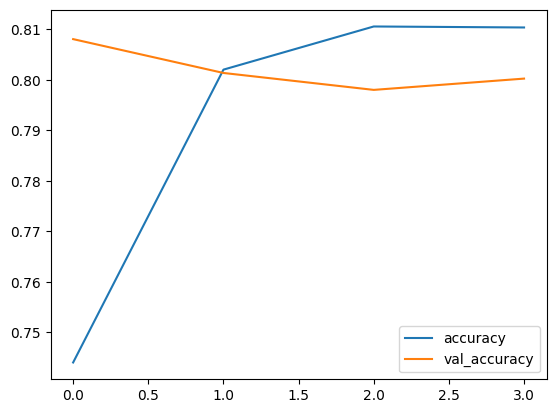

In [84]:
# Plot between accuracy and val_accuracy


history_seq_df2[['accuracy', 'val_accuracy']].plot()

<AxesSubplot: >

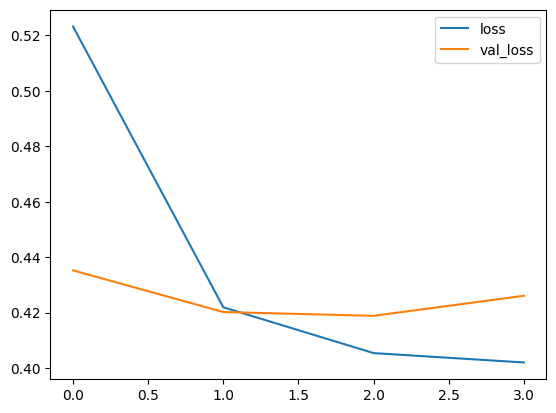

In [85]:
# Plot between loss and val_loss

history_seq_df2[['loss', 'val_loss']].plot()

From the two curve we can see that this data is slighly better than the first model.

33/33 [==============================] - 0s 1ms/step


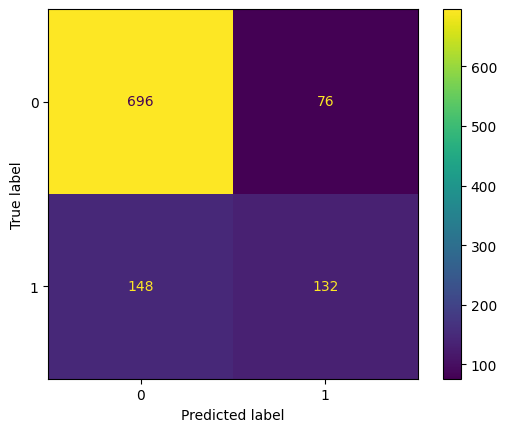

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       772
           1       0.63      0.47      0.54       280

    accuracy                           0.79      1052
   macro avg       0.73      0.69      0.70      1052
weighted avg       0.77      0.79      0.78      1052



In [97]:
# Model Evaluation

y_pred_seq2 = model_sequential2.predict(X_test)
y_pred_seq2 = np.where(y_pred_seq2 >=0.5, 1, 0)

cm = confusion_matrix(y_test, y_pred_seq2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

print(classification_report(y_test, y_pred_seq2))

Based on the report we can see that the performance improvement we got after doing modification to our model is quite insignificant.

## 8.4 - Improved Functional API

Let's apply the same changes to our othe model and see whether it will improve the performance or not.

In [87]:
# Create Functional Model

input_layer2 = Input(shape=(42,))
hidden1_layer2 = Dense(25, activation='relu')(input_layer2)
norm1 = BatchNormalization()
hidden2_layer2 = Dense(15, activation='relu')(hidden1_layer2)
norm2 = BatchNormalization()
hidden3_layer2 = Dense(10, activation='relu')(hidden2_layer2)

concat_layer2 = concatenate([input_layer2, hidden3_layer2])
output_layer2 = Dense(1, activation='sigmoid')(concat_layer2)

model_functional2 = Model(inputs=input_layer2, outputs=output_layer2)

# Compile
model_functional2.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['accuracy'])

model_functional2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 42)]         0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 25)           1075        ['input_2[0][0]']                
                                                                                                  
 dense_13 (Dense)               (None, 15)           390         ['dense_12[0][0]']               
                                                                                                  
 dense_14 (Dense)               (None, 10)           160         ['dense_13[0][0]']               
                                                                                            

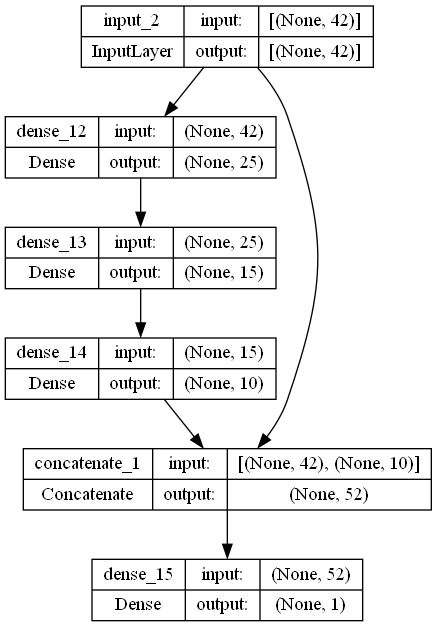

In [88]:
# Plot Layers

tf.keras.utils.plot_model(model_functional2, show_shapes=True)

In [89]:
%%time
his4 = model_functional2.fit(train_pipe, epochs=25, validation_data=val_pipe, callbacks=callback)

Epoch 1/25
305/305 [==============================] - 2s 3ms/step - loss: 0.4553 - accuracy: 0.7845 - val_loss: 0.4217 - val_accuracy: 0.8203
Epoch 2/25
305/305 [==============================] - 1s 3ms/step - loss: 0.4146 - accuracy: 0.8040 - val_loss: 0.4184 - val_accuracy: 0.8214
Epoch 3/25
305/305 [==============================] - 1s 3ms/step - loss: 0.4101 - accuracy: 0.8073 - val_loss: 0.4177 - val_accuracy: 0.8192
Epoch 4/25
305/305 [==============================] - 1s 3ms/step - loss: 0.4061 - accuracy: 0.8092 - val_loss: 0.4169 - val_accuracy: 0.8214
Epoch 5/25
305/305 [==============================] - 1s 4ms/step - loss: 0.4019 - accuracy: 0.8101 - val_loss: 0.4167 - val_accuracy: 0.8192
CPU times: total: 1.38 s
Wall time: 5.61 s


In [90]:
# Create DataFrame

history_fun_df2 = pd.DataFrame(his4.history)
history_fun_df2

,loss,accuracy,val_loss,val_accuracy
0,0.455303,0.784522,0.421741,0.820312
1,0.414640,0.804034,0.418443,0.821429
2,0.410104,0.807318,0.417731,0.819196
3,0.406115,0.809158,0.416906,0.821429
4,0.401889,0.810143,0.416655,0.819196


<AxesSubplot: >

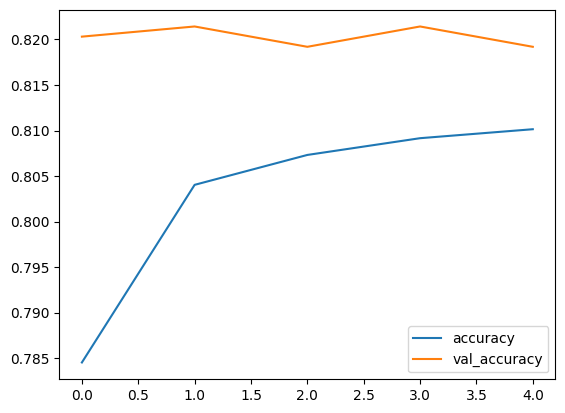

In [91]:
# Plot between accuracy and val_accuracy


history_fun_df2[['accuracy', 'val_accuracy']].plot()

<AxesSubplot: >

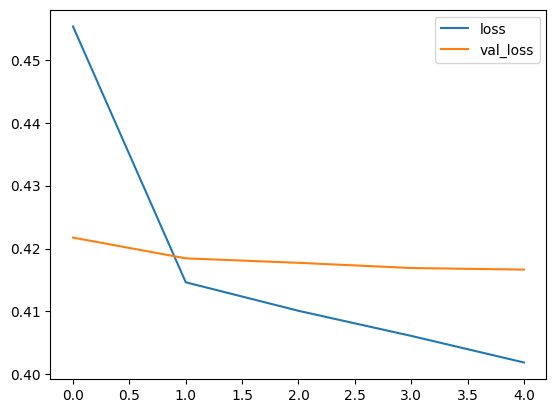

In [92]:
# Plot between loss and val_loss

history_fun_df2[['loss', 'val_loss']].plot()

33/33 [==============================] - 0s 1ms/step


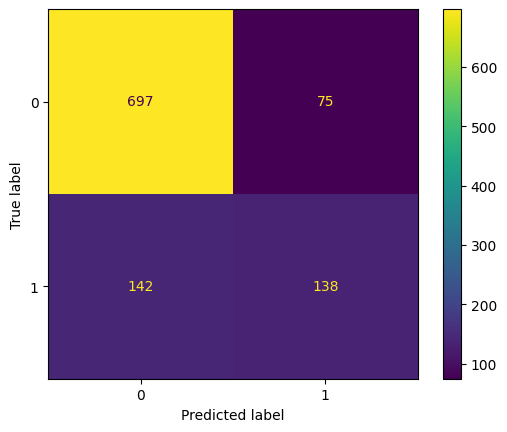

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       772
           1       0.65      0.49      0.56       280

    accuracy                           0.79      1052
   macro avg       0.74      0.70      0.71      1052
weighted avg       0.78      0.79      0.78      1052



In [96]:
# Model Evaluation

y_pred_fun2 = model_functional2.predict(X_test)
y_pred_fun2 = np.where(y_pred_fun2 >=0.5, 1, 0)

cm = confusion_matrix(y_test, y_pred_fun2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

print(classification_report(y_test, y_pred_fun2))

We can see that there are some significant improvements in our model performance after we did some modification.

## 8.5 - Model Selection

After attempting to improve the performance of both models, we got some improvements, but the model which got the most improvement is the functional API model that gain 6% f1 macro score for predicting the positive value, so we will use this model.

# 9 - Model Saving

In [106]:
model_functional2.trainable = False
model_functional2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 42)]         0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 25)           1075        ['input_2[0][0]']                
                                                                                                  
 dense_13 (Dense)               (None, 15)           390         ['dense_12[0][0]']               
                                                                                                  
 dense_14 (Dense)               (None, 10)           160         ['dense_13[0][0]']               
                                                                                            

In [107]:
# Save the Files

with open('pipeline.pkl', 'wb') as file_1:
  joblib.dump(final_pipeline, file_1)

model_functional2.save('model.h5')

# 10 - Model Inference

Now we will use our preferred model to predict a new dataset which is our inference data that we already split from the start, first we will load the model from the saved files.

In [109]:
# Load All Files

with open('pipeline.pkl', 'rb') as file_1:
  preprocessor = joblib.load(file_1)

model = load_model('model.h5')

Let's take a look of our inference data.

In [110]:
# Display Inference Set

data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,8879-ZKJOF,Female,0,No,No,41,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75,0
1,0201-MIBOL,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85,0
2,1600-DILPE,Female,0,No,No,12,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35,0
3,8601-QACRS,Female,0,No,No,5,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95,1
4,7919-ZODZZ,Female,0,Yes,Yes,10,Yes,No,DSL,No,...,Yes,No,No,Yes,One year,Yes,Mailed check,65.90,660.05,0
5,7964-ZRKKG,Male,0,Yes,No,67,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,One year,Yes,Bank transfer (automatic),88.40,5798.30,0
6,1357-BIJKI,Male,0,Yes,No,50,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,One year,Yes,Electronic check,98.25,4858.70,0
7,8720-RQSBJ,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,44.00,44.00,0
8,4682-BLBUC,Male,0,Yes,No,44,Yes,No,DSL,No,...,Yes,Yes,Yes,No,One year,Yes,Electronic check,70.95,3250.45,0
9,8930-XOTDP,Female,0,Yes,Yes,18,Yes,No,DSL,No,...,No,No,Yes,No,Month-to-month,No,Mailed check,55.95,1082.80,0


Now we will transform the data using the pipeline we already built.

In [111]:
X_inf = preprocessor.transform(data_inf)
X_inf

array([[ 0.3623336 ,  0.50248918,  0.46652477,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  1.        ,  0.        ,
         0.        ,  0.        ],
       [ 1.38578141,  1.25141189,  1.8609966 ,  0.        ,  1.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.     

After preprocessing complete we can run our model to predict the results.

In [117]:
# Predict using Linear regression

y_pred_inf = model.predict(X_inf)
y_pred_inf = np.where(y_pred_inf >=0.5, 1, 0)
y_pred_inf

1/1 [==============================] - 0s 26ms/step


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0]])

And finally we can add the results to our inference dataset.

In [118]:
data_inf['Churn - Prediction'] = y_pred_inf
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn - Prediction
0,8879-ZKJOF,Female,0,No,No,41,Yes,No,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75,0,0
1,0201-MIBOL,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85,0,0
2,1600-DILPE,Female,0,No,No,12,Yes,No,DSL,No,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35,0,0
3,8601-QACRS,Female,0,No,No,5,Yes,Yes,DSL,No,...,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95,1,0
4,7919-ZODZZ,Female,0,Yes,Yes,10,Yes,No,DSL,No,...,No,No,Yes,One year,Yes,Mailed check,65.90,660.05,0,0
5,7964-ZRKKG,Male,0,Yes,No,67,Yes,Yes,Fiber optic,No,...,No,Yes,No,One year,Yes,Bank transfer (automatic),88.40,5798.30,0,0
6,1357-BIJKI,Male,0,Yes,No,50,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Electronic check,98.25,4858.70,0,0
7,8720-RQSBJ,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,Month-to-month,No,Electronic check,44.00,44.00,0,1
8,4682-BLBUC,Male,0,Yes,No,44,Yes,No,DSL,No,...,Yes,Yes,No,One year,Yes,Electronic check,70.95,3250.45,0,0
9,8930-XOTDP,Female,0,Yes,Yes,18,Yes,No,DSL,No,...,No,Yes,No,Month-to-month,No,Mailed check,55.95,1082.80,0,0


# 11 - Conclusion

## 11.1 - Model Analysis

- The goal of the model is to predict customer who will stop using our service.
- From 2 basic and 2 improved model, we determined that the improved functional API model is the one with the best performance.
- Based on accuracy the model could predict with 79% accuracy.
- Based on the macro f1-score, the model could predict the negative value with 87% accuracy but can only predict the positive value with 56% accuracy, therefore further improvement may needs to be done.
- Model improvement was done by applying normalized and early stopping, and improved around 6% of macro f1-score for the positive values, and around 1% for total accuracy.
- The model could be improved further by adding or removing some features.
- The model could also be improved further by modifying the architectural of the model.
- It is very reccommended to try to improve the other model as well because the other model have pretty similar performance with this model.

## 11.2 - Overall Analysis

- Based on EDA, we gather some informations such as:
1. Users demographic:
    - Balanced between genders and marriage status.
    - Only small portion are senior citizens.
    - There are more users without dependents, and the one with dependents are most likely in a marriage status.
2. Customers with short tenure is dominated by the one with month-to-month contracts, while the one with long tenure is dominated by customers with two-year contracts so we could say that there are significant difference between contract and user loyalty.
3. Most of our users uses our internet service and almost all of them uses our phone service.
4. Out of our 3 additional internet service, the online security service is the one with least users.
5. 96% of our senior citizen users uses our internet service, so we cannot say that the older user tend to only uses our phone service.
6. Users with dependents have no significant difference between whether they use our TV or movie streaming service.
7. User monthly charges based on demographic:
    - There are no significant difference between genders and monthly charges.
    - Older users tend to have higher monthly charges.
    - User with low monthly charges tend to have dependents on their households.
8. Users that most likely to stop using our services are the senior citizens.
9. Based on tenure and type of contracts we can say that users with longer terms are less likely to churn.
10. User with low monthly charges is less likely to churn, on the other hand there are a range of monthly charges that have a significant portion of churned users which is around 70-110.

- From preprocessing, we gather some information such as:
1. There are some missing values in total charges feature.
2. The missing values are because this is new users that haven't been charged for our services yet.
3. There are no outliers in our dataset.
4. Gender and phone service features have weak correlation with our target which is churn.
5. The numerical data was transformed using standardscaler because most of our data is normally distributed, and the categorical data is encoded with onehotencoder because there are no ranked categorical data.